In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# X, y = mnist["data"], mnist["target"]

In [13]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


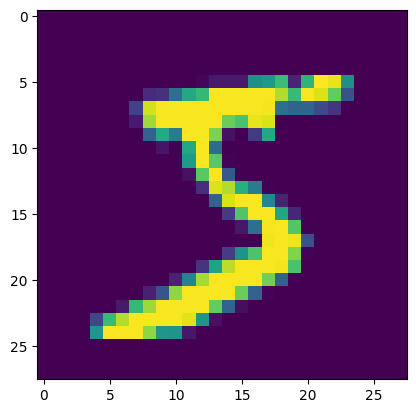

In [15]:
plt.imshow(x_train[0])
plt.show()

In [18]:
y_train[0]

5

In [19]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [31]:
print(y_train_5)

[ True False False ...  True False False]


In [32]:
sgd_clf = SGDClassifier(random_state=42)
x_train_reshaped=x_train.reshape(60000,784)
sgd_clf.fit(x_train_reshaped, y_train_5)

SGDClassifier(random_state=42)

In [36]:
sgd_clf.predict(x_train_reshaped[0].reshape(1,784))

array([ True])

In [41]:
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(x_train_reshaped, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = x_train_reshaped[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = x_train_reshaped[test_index]
  y_test_fold = y_train_5[test_index]
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [43]:
cross_val_score(sgd_clf, x_train_reshaped, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])